In [4]:
import torchaudio
import datasets
from IPython.display import Audio,display
from torch.utils.data.dataloader import DataLoader
import matplotlib.pyplot as plt
import torch
import torchsummary
from torch.nn import *



c:\Users\Majid\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
data = datasets.load_dataset('speech_commands','v0.02',streaming=True)
data

IterableDatasetDict({
    train: IterableDataset({
        features: ['file', 'audio', 'label', 'is_unknown', 'speaker_id', 'utterance_id'],
        n_shards: 6
    })
    validation: IterableDataset({
        features: ['file', 'audio', 'label', 'is_unknown', 'speaker_id', 'utterance_id'],
        n_shards: 1
    })
    test: IterableDataset({
        features: ['file', 'audio', 'label', 'is_unknown', 'speaker_id', 'utterance_id'],
        n_shards: 1
    })
})

In [24]:
SR = 16_000

dt = data['train'].filter(lambda d: (d['label'] in [1,2,3,4] ) and (d['audio']['array'].shape[-1]==SR ))

In [25]:
train_data = DataLoader(dt,32 )#data['train'])
train_data

In [20]:
b = next(iter(train_data))
b

KeyboardInterrupt: 

In [26]:
for b in train_data:
    print(b)

{'file': ['down/2356b88d_nohash_0.wav', 'down/3291330e_nohash_3.wav', 'down/43f57297_nohash_0.wav', 'down/b91b718c_nohash_3.wav', 'down/85851131_nohash_1.wav', 'down/c39703ec_nohash_1.wav', 'down/244cc3a5_nohash_0.wav', 'down/890e4ee2_nohash_1.wav', 'down/21832144_nohash_2.wav', 'down/3ae5c04f_nohash_0.wav', 'down/18e910f4_nohash_3.wav', 'down/9151f184_nohash_2.wav', 'down/9ff2d2f4_nohash_0.wav', 'down/c948d727_nohash_1.wav', 'down/86f3558f_nohash_0.wav', 'down/651d108f_nohash_0.wav', 'down/c0c0d87d_nohash_1.wav', 'down/ef3367d9_nohash_6.wav', 'down/190821dc_nohash_2.wav', 'down/fc3ba625_nohash_3.wav', 'down/8e523821_nohash_1.wav', 'down/06f6c194_nohash_2.wav', 'down/5a5721f8_nohash_4.wav', 'down/da584bc0_nohash_3.wav', 'down/179a61b7_nohash_0.wav', 'down/3d53244b_nohash_3.wav', 'down/c22ebf46_nohash_4.wav', 'down/18e910f4_nohash_1.wav', 'down/7096522d_nohash_0.wav', 'down/ac9dee0e_nohash_3.wav', 'down/42a99aec_nohash_2.wav', 'down/62f05757_nohash_2.wav'], 'audio': {'path': ['2356b88d_

Exception ignored from cffi callback <function SoundFile._init_virtual_io.<locals>.vio_tell at 0x0000015AA906E550>:
Traceback (most recent call last):
  File "c:\Users\Majid\AppData\Local\Programs\Python\Python39\lib\site-packages\soundfile.py", line 1264, in vio_tell
    @_ffi.callback("sf_vio_tell")
KeyboardInterrupt: 


KeyboardInterrupt: 

In [9]:
a = b['audio']['array']
sr = b['audio']['sampling_rate'].numpy()
label = b['label']
print(a.shape)

torch.Size([32, 16000])


In [10]:
display(Audio(a[2].numpy(),rate=sr[0]))

c:\Users\Majid\AppData\Local\Programs\Python\Python39\lib\site-packages\torchaudio\functional\functional.py:584: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (201) may be set too low.
  warnings.warn(


tensor([[-18.4207, -18.4207, -18.4207,  ..., -18.4207, -18.4207, -18.4207],
        [-10.6787,  -6.8792,  -8.2510,  ..., -11.3137,  -7.1519,  -8.4776],
        [ -8.9956,  -5.1957,  -6.5675,  ...,  -9.6309,  -5.4684,  -6.7941],
        ...,
        [-12.5496, -14.8707, -13.6900,  ..., -12.3112, -12.7708, -13.4543],
        [-12.9244, -15.3369, -15.4229,  ..., -13.1276, -13.4580, -13.2756],
        [-13.1617, -15.4948, -15.0075,  ..., -15.0366, -14.8405, -13.8714]])


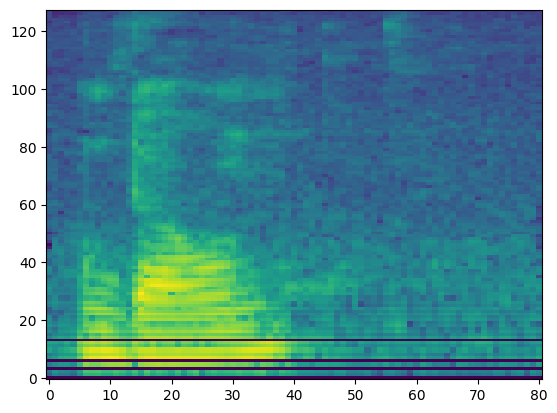

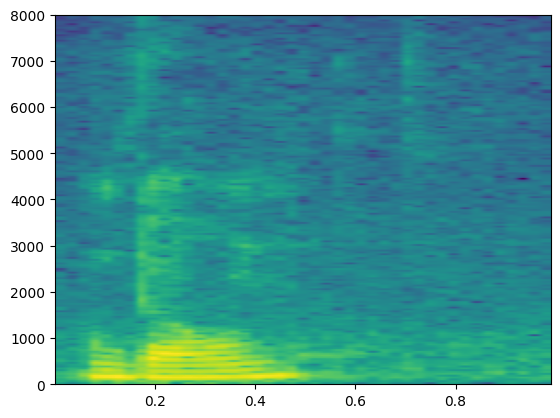

In [11]:
ms =  torchaudio.transforms.MelSpectrogram(sr[0], n_fft=400)#,win_length=128,hop_length=8)
spec = ms(a[1].float())
spec= torch.log(spec+1e-8)
print(spec)
plt.imshow(spec, aspect='auto', origin='lower', interpolation='nearest')
plt.show()
plt.specgram(a[1],400,sr[0],noverlap=32,detrend='none')

spec=spec.unsqueeze(0).transpose(1, 2)

In [12]:
#.reshape((1,128,-1))
print(spec.shape)
ml = MultiheadAttention(128,8)
i=0
for p in ml.parameters():
    i=i+p.flatten().size()[0]

print(i)
    
r,m = ml(spec,spec,spec)
r:torch.Tensor
print(r.shape)

x = Conv1d(128,256,3,1,1)(r.permute((0,2,1)))
x= x.permute((0,2,1))
x,m = MultiheadAttention(256,8)(x,x,x)
x.shape   


torch.Size([1, 81, 128])
66048
torch.Size([1, 81, 128])


torch.Size([1, 81, 256])

In [13]:
class conformer(modules.Module):
    def __init__(self,channel_size, *args, **kwargs) -> None:
        super().__init__(*args, **kwargs)
        self.att = MultiheadAttention(channel_size,9)
        self.conv1d = Conv1d(channel_size,channel_size,3,2,1)
        self.nl = LayerNorm(channel_size)
        self.mp = MaxPool1d(3,2,1)
        
        
        
        
    def forward(self,input ):
        x,_ = self.att.forward(input,input,input)
        x = x/2 + input
        x:torch.Tensor 
        x1 = x.permute((0,2,1))
        x = self.conv1d(x1)
        x1 = self.mp(x1)
        x= x/2 + x1
        x = x.permute((0,2,1))
        x = self.nl(x)
        
        return x
        
        pass
    
    
ms =  torchaudio.transforms.MelSpectrogram(sr[0], n_fft=400)#,win_length=128,hop_length=8)
spec = ms(a[1].float())
spec= torch.log(spec+1e-8)
spec = spec.unsqueeze(0)#.transpose(1, 2)
print(spec.shape)
K=81
model = Sequential(
    
    conformer(K),
    conformer(K),
    conformer(K),
    conformer(K),
    conformer(K),
    conformer(K),
    conformer(K),

    Flatten(),
    #Linear(128,4),
    Softmax()
    
    
)
print(model.forward(spec).shape)

torchsummary.summary(model,(128,81),-1,'cpu')
i=0
for x in model.parameters():
   i = x.flatten().size()[0] + i
   
   
print(i/1000)

torch.Size([1, 128, 81])
torch.Size([1, 81])
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv1d-1               [-1, 81, 64]          19,764
         MaxPool1d-2               [-1, 81, 64]               0
         LayerNorm-3               [-1, 64, 81]             162
         conformer-4               [-1, 64, 81]               0
            Conv1d-5               [-1, 81, 32]          19,764
         MaxPool1d-6               [-1, 81, 32]               0
         LayerNorm-7               [-1, 32, 81]             162
         conformer-8               [-1, 32, 81]               0
            Conv1d-9               [-1, 81, 16]          19,764
        MaxPool1d-10               [-1, 81, 16]               0
        LayerNorm-11               [-1, 16, 81]             162
        conformer-12               [-1, 16, 81]               0
           Conv1d-13                [-1, 81, 8]          1

c:\Users\Majid\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\modules\module.py:1511: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


In [15]:
device = 'cuda'
model = model.to(device)
opt = torch.optim.RAdam(model.parameters(),1e-3)
crict = torch.nn.CrossEntropyLoss()
def step(inp,label):
    opt.zero_grad()
    preds = model.forward(inp)
    loss = crict.forward(preds, label)
    loss.backward()
    
    
    opt.step()
    return loss


for epochs in range(1):
    for b in train_data:
        inp = b['audio']['array']
        mels =  torchaudio.transforms.MelSpectrogram(SR, n_fft=400)#,win_length=128,hop_length=8)
        inp = mels(inp.float())
        inp= torch.log(inp + 1e-8)
        label = b['label'].to(device)
        print(inp.shape)
        loss = step(inp.to(device),label)
        print(loss)


c:\Users\Majid\AppData\Local\Programs\Python\Python39\lib\site-packages\torchaudio\functional\functional.py:584: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (201) may be set too low.
  warnings.warn(


torch.Size([32, 128, 81])


c:\Users\Majid\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\modules\module.py:1511: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


tensor(4.3985, device='cuda:0', grad_fn=<NllLossBackward0>)


RuntimeError: stack expects each tensor to be equal size, but got [16000] at entry 0 and [12632] at entry 7

range(0, 10)